In [117]:
#Импорт библиотек и csv файла
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

df = pd.read_csv("S02-hw-dataset.csv")

In [118]:
#Вывод информации о дата-сете
print("Информация о дата-сете:")
df.info()
print("\nРазмер дата-сета(строки|столбцы):", df.shape,"\n")
df.head(5).T #Первые 5 элементов

Информация о дата-сете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB

Размер дата-сета(строки|столбцы): (41, 5) 



,0,1,2,3,4
user_id,1,2,3,4,5
age,25.0,24.0,52.0,31.0,NaN
country,FR,RU,FR,RU,DE
purchases,7,5,7,6,6
revenue,749,1115,399,654,1296


In [119]:
print("Описательная статистика для категориальных признаков:")
print("\tcountry:", df['country'].unique())

print("\nОписательная статистика для числовых признаков:")
df.describe().T

Описательная статистика для категориальных признаков:
	country: ['FR' 'RU' 'DE' 'CN' 'US']

Описательная статистика для числовых признаков:


,count,mean,std,min,25%,50%,75%,max
user_id,41.0,20.243902,11.659289,1.0,10.0,20.0,30.0,40.0
age,39.0,36.512821,18.304259,5.0,24.0,33.0,45.5,120.0
purchases,41.0,4.829268,2.710189,-1.0,3.0,5.0,7.0,11.0
revenue,41.0,820.048780,613.127269,0.0,432.0,693.0,1115.0,2475.0


In [120]:
print("\nПропущенные значения:\n", df.isnull().sum())
print("\nПроцент пропусков:\n", (df.isnull().mean() * 100).round(2))
print(f"\nПолностью дублированных строк:{df.duplicated().sum()}")


Пропущенные значения:
 user_id      0
age          2
country      0
purchases    0
revenue      0
dtype: int64

Процент пропусков:
 user_id      0.00
age          4.88
country      0.00
purchases    0.00
revenue      0.00
dtype: float64

Полностью дублированных строк:1


In [121]:
print("Подозрительные значения возраста:\n", df[(df['age'] < 18) | (df['age'] > 100)],"\n")
print("Подозрительные значения покупок:\n", df[(df['purchases'] < 0)],"\n")

Подозрительные значения возраста:
     user_id    age country  purchases  revenue
5         6  120.0      FR         -1      785
20       21    5.0      RU          8     1488 

Подозрительные значения покупок:
    user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785 



Проблемы Дата-сета:

1.   Наличие подозрительных значений возраста(до 18 и после 100 лет), так же 2 пропуска в данном значении. Требуется убрать выбросы так как это может повлиять на качетсво данных. Нулевые строки тоже исключить, так как нельзя заполнить медианой или крайними значениями.

2.   Наличие отрицательных значений в столбце 'purchases', что противоречит природе данных. Удалить строчку, потому что данные ошибочные.

3.   Наличие одной дублирующийся строки. Возможная ошибка в заполнении данных, требуется удалить.

In [122]:
df1 = df.copy() #Копируем дата-сет, чтобы работать с ним

#Удаление дубликатов и пропущенных значений
df1.dropna(inplace=True)
df1.drop_duplicates(inplace=True)

#Проверка на удаление
print("\nПропущенные значения:\n", df1.isnull().sum())
print(f"\nПолностью дублированных строк:{df1.duplicated().sum()}")


Пропущенные значения:
 user_id      0
age          0
country      0
purchases    0
revenue      0
dtype: int64

Полностью дублированных строк:0


In [123]:
#Удаление подозрительных значений
df1 = df1.loc[df1['age']>18]
df1 = df1.loc[df1['age']<100]

df1 = df1.loc[df1['purchases']>0]

print("\nНовая описательная статистика для числовых признаков:")
df1.describe().T


Новая описательная статистика для числовых признаков:


,count,mean,std,min,25%,50%,75%,max
user_id,32.0,21.21875,11.589023,1.0,11.75,22.5,30.25,40.0
age,32.0,36.21875,11.284401,20.0,25.75,34.5,45.50,57.0
purchases,32.0,5.15625,2.215916,1.0,3.00,5.5,7.00,11.0
revenue,32.0,869.00000,623.639371,0.0,439.50,697.5,1126.75,2475.0


In [124]:
print('Группировка дохода по странам:\n', df1.groupby('country')['revenue'].agg(['min', 'max', 'mean', 'count']).round(2), '\n')
print('Группировка покупок по странам:\n', df1.groupby('country')['purchases'].agg(['min', 'max', 'mean', 'count']).round(2), '\n')
print('Частоты стран:')
df1['country'].value_counts()

Группировка дохода по странам:
          min   max     mean  count
country                           
CN       456  1652  1054.00      2
DE       702  2475  1568.25      4
FR       142  1608   732.60     10
RU       432  2086   919.11      9
US         0   980   547.00      7 

Группировка покупок по странам:
          min  max  mean  count
country                       
CN         2    7  4.50      2
DE         3   11  7.25      4
FR         1    7  5.20     10
RU         2    7  5.22      9
US         3    5  4.00      7 

Частоты стран:


,count
country,
FR,10
RU,9
US,7
DE,4
CN,2


По итогу EDU-анализа мы выяснили:
1.   US показала наименьшии значения в минимальном и максимальном доходах.
2.   Наилучший результат в доходах занимает DE.
3.   Минимальное число покупок всех каждой из стран почти не различается.
4.   Максимальное число покупок всех каждой из стран почти не различается, кроме US и DE.
5.   Данные в большей мере взяты из FR и RU.
6.   Данных из CN слишком мало, из-за чего можно получить неполную информацию.

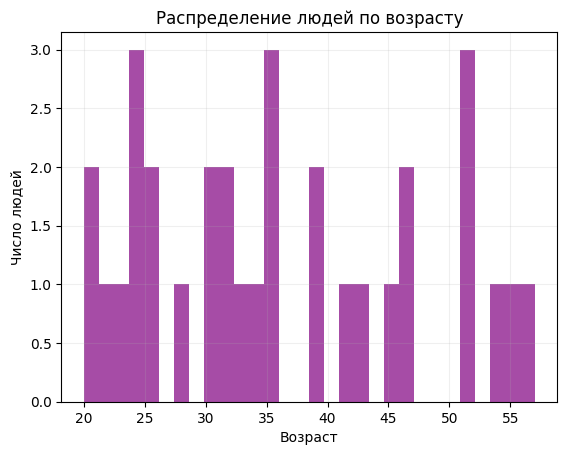

In [146]:
os.makedirs('figures', exist_ok=True) #Создаем папку для графиков

plt.plot()
plt.hist(x=df1['age'], bins=30, alpha=0.7, color='purple')
plt.xlabel("Возраст")
plt.ylabel("Число людей")
plt.title("Распределение людей по возрасту")
plt.grid(True, alpha=0.2)

plt.savefig('figures/histogram_age.png')

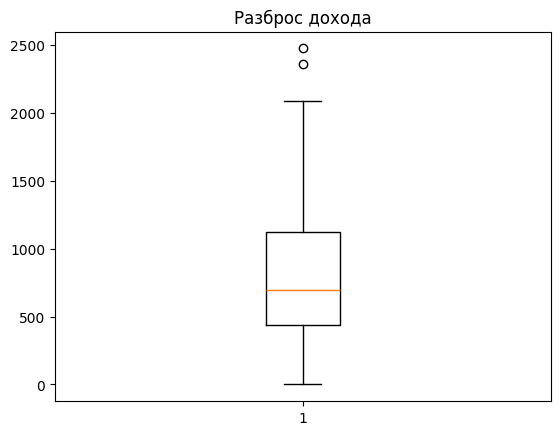

In [136]:
plt.boxplot(df1['revenue'])
plt.title("Разброс дохода")
plt.savefig('figures/boxplot_revenue.png')

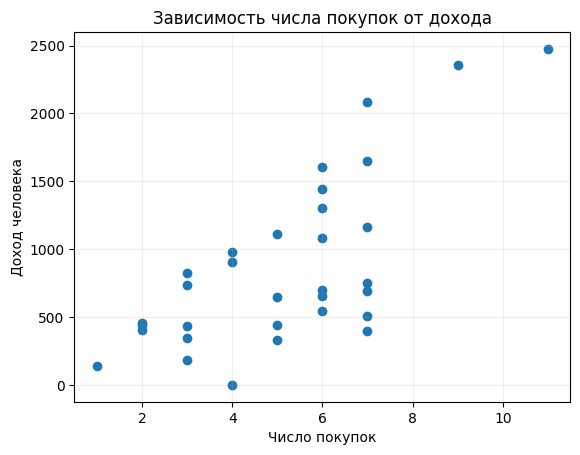

In [144]:
plt.scatter(df1['purchases'], df1['revenue'])
plt.xlabel("Число покупок")
plt.ylabel("Доход человека")
plt.title("Зависимость числа покупок от дохода")
plt.grid(True, alpha=0.2)

plt.savefig('figures/scatter_purchases_revenue.png')

In [149]:
df1.to_csv('filtred.csv')